In [39]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  

In [41]:
# Read the CSV file into a pandas DataFrame and set the first column as the index (index_col=0)
poverty = "/Users/nning./Desktop/DA G25/poverty.csv"
data = pd.read_csv(poverty,index_col=0)

In [43]:
# Replace all dots ('.') in column names with underscores ('_') to make them easier to reference in Python
data.columns = [col.replace('.', '_') for col in data.columns]

## **Phase 1: Univariate Regression Analysis**

### **Model 1: Poverty vs Fertility**

In [45]:
# Analyze the model of poverty in relation to the fertility
model_poverty_fertility = ols(formula='population_in_poverty ~ Fertility_rate', data=data).fit()

model_poverty_fertility_summary = model_poverty_fertility.summary()

# Retrieve the confidence intervals and p-values
conf_int_poverty_fertility = model_poverty_fertility.conf_int()  
p_values_poverty_fertility = model_poverty_fertility.pvalues  

# Output the results
(model_poverty_fertility_summary, conf_int_poverty_fertility, p_values_poverty_fertility)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                               OLS Regression Results                             
 Dep. Variable:     population_in_poverty   R-squared:                       0.828
 Model:                               OLS   Adj. R-squared:                  0.823
 Method:                    Least Squares   F-statistic:                     149.5
 Date:                   Sun, 02 Mar 2025   Prob (F-statistic):           2.14e-13
 Time:                           21:43:41   Log-Likelihood:                -93.807
 No. Observations:                     33   AIC:                             191.6
 Df Residuals:                         31   BIC:                             194.6
 Df Model:                              1                                         
 Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------

This tells us that our best-fitting line to the data is:
$$
\widehat{\text{poverty}} = \hat{\alpha} + \hat{\beta} x_i = -85.4064 + 39.9554 \times \text{Fertility Rate}
$$
where
- **$\hat{\alpha} = -85.4064$** is the **intercept coefficient**, which means that when the **Fertility Rate = 0**, the estimated poverty rate would be **-85.4064**. However, this is **not practically meaningful**, as fertility rates cannot be zero in real-world scenarios.
  
- **$\hat{\beta} = 39.9554$** is the **slope coefficient** associated with the explanatory variable **Fertility Rate**, summarizing the relationship between **poverty rate** and **Fertility Rate**. That is, as **Fertility Rate** increases, so does **poverty**, such that:
  - **For every 1-unit increase in Fertility Rate, the poverty rate increases by approximately 39.9554 units.**

In [47]:
# Define a function to extract key regression metrics
def summarize_regression(model, model_name="Regression Model"):
    summary_data = {
        "R-squared": model.rsquared,
        "Adjusted R-squared": model.rsquared_adj,
        "AIC": model.aic,
        "BIC": model.bic
    }

    summary_df = pd.DataFrame(summary_data, index=[model_name])
    return summary_df

In [49]:
# Apply the summarize_regression function to the regression model
summarize_regression(model_poverty_fertility,model_name="Poverty vs Fertility")

,R-squared,Adjusted R-squared,AIC,BIC
Poverty vs Fertility,0.828289,0.82275,191.613793,194.606808



- **R² = 0.828** → Fertility rate explains **82.8%** of the variation in poverty.
- **p-value < 0.05** → Indicates that the effect of fertility rate on poverty is statistically significant.
- **Regression coefficient = 39.9554**, meaning that **for each unit increase in fertility rate, the poverty rate increases by approximately 39.96 units** (holding other variables constant).

---

- **Confidence interval for fertility rate:**  \[33.291, 46.619\]→ **Indicates that the effect of this variable on poverty is stable.**
- **Confidence interval for the intercept:**  \[-103.297, -67.516\] → **Indicates that the baseline level of poverty in the model is statistically significant.**

---

- **F-statistic = 149.5 (p < 0.05)** → The model as a whole is statistically significant, indicating that the effect of fertility rate on poverty is valid.

In [51]:
 # Define a function to create residuals, fitted values and other diagnostics
def plot_model_diagnostics(model, model_name):
    # Residuals vs Fitted
    fitted_values = model.fittedvalues
    residuals = model.resid
    
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    
    # Residuals vs Fitted Values
    axs[0, 0].scatter(fitted_values, residuals, alpha=0.5)
    axs[0, 0].axhline(y=0, color='r', linestyle='--')
    axs[0, 0].set_title(f'{model_name}: Residuals vs Fitted Values')
    axs[0, 0].set_xlabel('Fitted Values')
    axs[0, 0].set_ylabel('Residuals')
    
    # Histogram of Residuals
    sns.histplot(residuals, kde=True, bins=20, color='skyblue', ax=axs[0, 1])
    axs[0, 1].set_title(f'{model_name}: Histogram of Residuals')
    axs[0, 1].set_xlabel('Residuals')
    axs[0, 1].set_ylabel('Frequency')

    # Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=axs[1, 0])
    axs[1, 0].set_title(f'{model_name}: Q-Q Plot of Residuals')

    # Hide the bottom-right subplot to remove the empty space
    axs[1, 1].set_visible(False)

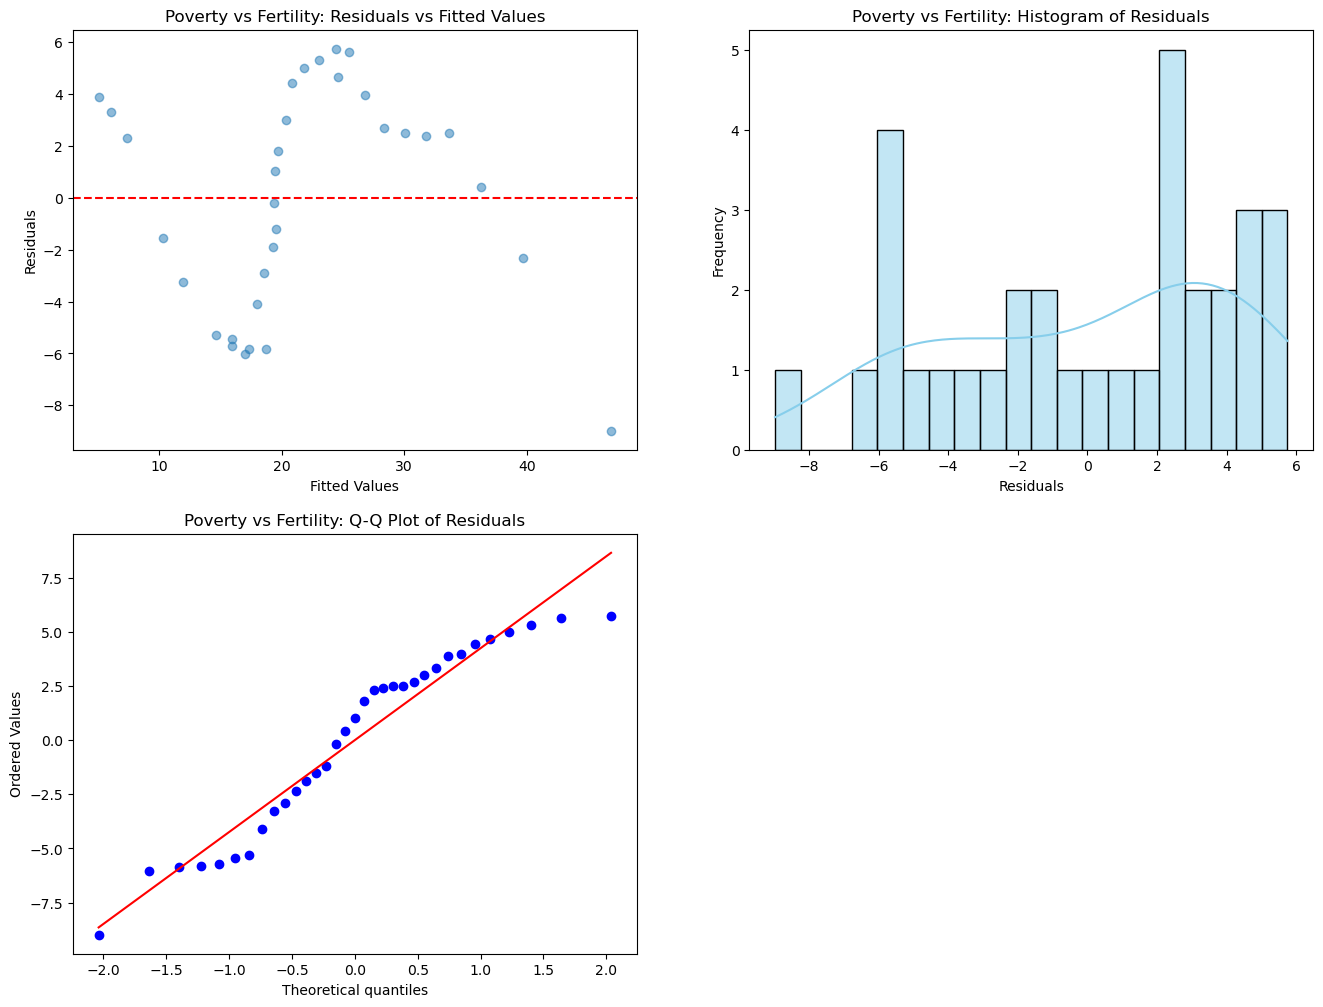

In [53]:
# Plot diagnostics for this model
plot_model_diagnostics(model_poverty_fertility, "Poverty vs Fertility")

### **Assumption Checking**
1. **Mean of Residuals is Zero**
- From the Residuals vs Fitted Values plot, we observe that the mean of residuals is close to zero, but some patterns exist in certain areas.
- This indicates that the explanatory variables in the model may not fully capture the trend in the data, and additional variables might be needed to improve model fit.

3. **Homoscedasticity - Constant Variance of Residuals**
- From the Residuals vs Fitted Values plot, the residuals exhibit unequal spread across different fitted values, suggesting the presence of heteroscedasticity.
- This indicates that the assumption of constant variance may not hold.

3. **Normality of Residuals**
- From the Residual Histogram, the residuals roughly follow a bell-shaped distribution but show heavier tails, suggesting slight skewness.
- From the Q-Q Plot, residuals deviate from the reference line at both ends, indicating deviations from normality at the extremes.
- This suggests that residuals may not fully meet the normality assumption but the deviation is minor. 

4. **Independence of Residuals**
- From the Residuals vs Fitted Values plot, residuals do not show an obvious cyclical pattern, suggesting potential independence.

5. **No Measurement Error in Explanatory Variables**
- Since the data is obtained from reliable sources and the model assumes that explanatory variables are measured accurately, we assume this assumption holds.
  
---

### **Conclusion**
1. The effect of fertility rate on poverty is significant and positively correlated (higher fertility rate leads to higher poverty rate).  
2. The model has a relatively good fit (**R² = 0.828**), but **17.2%** of the variation in poverty cannot be explained by the fertility rate.  
3. The confidence interval suggests that the effect of fertility rate on poverty is stable.  

---

### **Model Optimization**

1. **Consider transforming the fertility rate variable using log transformation**  
- The scatter plot shows a nonlinear trend. Applying a **log transformation to fertility rate** can help examine whether the **marginal effect of fertility rate decreases** (i.e., whether the impact of fertility on poverty becomes weaker at higher fertility rates).  

2. **Incorporate education level as an additional explanatory variable**  
- Adding **expected years of schooling** to the model can help determine whether **fertility rate remains significant after controlling for education**.  
- This will allow us to assess whether **education is a more important factor than fertility rate in explaining poverty**.  

---
### **Model 2: Poverty vs Education**

In [57]:
# Analyze the model of poverty in relation to the expected years of schooling.
model_poverty_education = ols(formula='population_in_poverty ~ Expected_years_of_schooling', data=data).fit()

model_poverty_education_summary = model_poverty_education.summary()

# Retrieve the confidence intervals and p-values.
conf_int_poverty_education = model_poverty_education.conf_int()  
p_values_poverty_education = model_poverty_education.pvalues  

# Output the results.
(model_poverty_education_summary, conf_int_poverty_education, p_values_poverty_education)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                               OLS Regression Results                             
 Dep. Variable:     population_in_poverty   R-squared:                       0.990
 Model:                               OLS   Adj. R-squared:                  0.990
 Method:                    Least Squares   F-statistic:                     3019.
 Date:                   Sun, 02 Mar 2025   Prob (F-statistic):           1.84e-32
 Time:                           21:44:35   Log-Likelihood:                -47.164
 No. Observations:                     33   AIC:                             98.33
 Df Residuals:                         31   BIC:                             101.3
 Df Model:                              1                                         
 Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------

This tells us that our best-fitting line to the data is:

$$
\widehat{\text{poverty}} = \hat{\alpha} + \hat{\beta} x_i = 106.7193 - 7.6675 \times \text{Expected Years of Schooling}
$$

where

- **$\hat{\alpha} = 106.7193$** is the **intercept coefficient**, which means that when the **Expected Years of Schooling = 0**, the estimated poverty rate would be **106.7193**. However, this is **not practically meaningful**, as education years cannot be zero in real-world scenarios.

- **$\hat{\beta} = -7.6675$** is the **slope coefficient** associated with the explanatory variable **Expected Years of Schooling**, summarizing the relationship between **poverty rate** and **education level**. That is, as **Expected Years of Schooling** increases, **poverty rate** decreases, such that:

  - **For every 1-year increase in Expected Years of Schooling, the poverty rate decreases by approximately 7.6675 units.**

In [59]:
# Apply the summarize_regression function to the regression model
summarize_regression(model_poverty_education,model_name="Poverty vs Education")

,R-squared,Adjusted R-squared,AIC,BIC
Poverty vs Education,0.989835,0.989507,98.328126,101.321141


- **R² = 0.990** → Expected years of schooling explains **99.0%** of the variation in poverty, indicating a strong effect.  

- **p-value < 0.05** → Indicates that the effect of education level on poverty is statistically significant.  

- **Regression coefficient = -7.6675**, meaning that **for each additional year of education, the poverty rate decreases by approximately 7.67 units (holding other variables constant).**

---

### **Confidence Intervals**
- **Confidence interval for expected years of schooling:** \[-7.952, -7.383\] → Indicates that the effect of this variable on poverty is stable.  

- **Confidence interval for the intercept:** \[103.533, 109.905\] → Indicates that the baseline level of poverty in the model is statistically significant.  

---

### **F-Statistic**
- **F-statistic = 3019 (p < 0.05)** → The model as a whole is statistically significant, indicating that the effect of education level on poverty is valid.

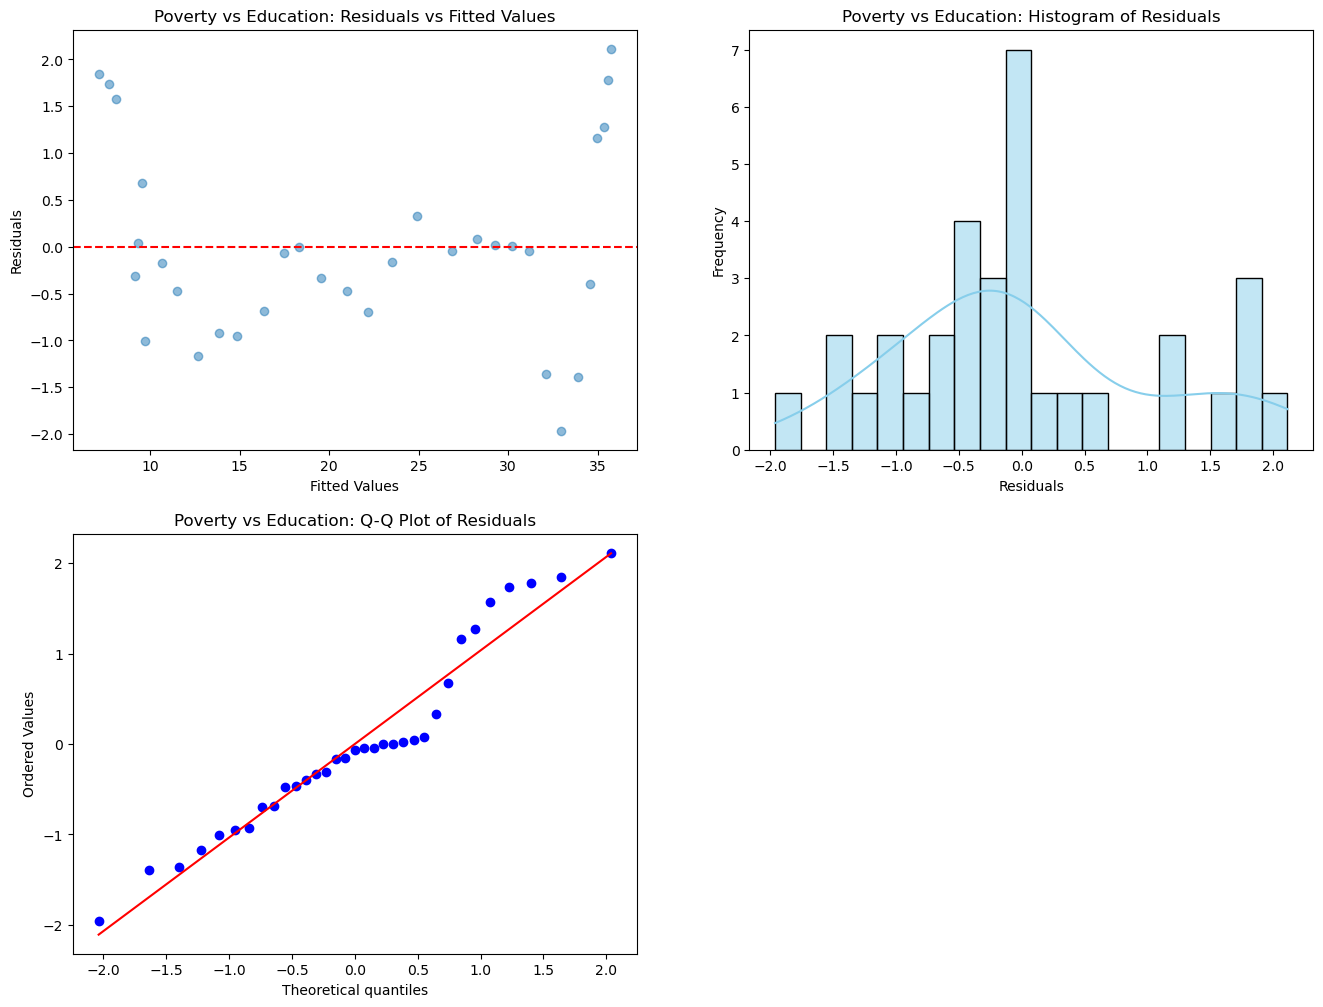

In [61]:
# Plot diagnostics for this model
plot_model_diagnostics(model_poverty_education, "Poverty vs Education")

### **Assumption Checking**

1. **Mean of Residuals is Zero**

- From the **Residuals vs Fitted Values** plot, the mean of residuals is close to zero, but some patterns exist in certain areas.  
- This indicates that the explanatory variables in the model may not fully capture the trend in the data, and additional variables might be needed to improve model fit.

2. **Homoscedasticity - Constant Variance of Residuals**

- From the **Residuals vs Fitted Values** plot, the residuals appear to be evenly spread across fitted values, indicating that the assumption of constant variance roughly holds.  

3. **Normality of Residuals**

- From the **Residual Histogram**, residuals roughly follow a normal distribution, but there may be slight deviations at the tails.  
- From the **Q-Q Plot**, residuals slightly deviate from the reference line at extreme values, indicating minor non-normality.

4. **Independence of Residuals**

- From the **Residuals vs Fitted Values** plot, the residuals do not show an obvious trend or cyclic pattern, suggesting potential independence.  

5. **No Measurement Error in Explanatory Variables**
- Since the data is obtained from reliable sources and the model assumes that explanatory variables are measured accurately, we assume this assumption holds.
  
---

### **Conclusion**

1. **The effect of education level on poverty is significant and negatively correlated** (higher education level leads to lower poverty rate).  

2. **The model has a relatively good fit (R² = 0.990), but 1.0% of the variation in poverty cannot be explained by education level.**  

3. **The confidence interval suggests that the effect of education on poverty is stable.**  

---

### **Model Optimization**

1. **Incorporate Fertility Rate as an Additional Explanatory Variable**
- The current model only considers education, but fertility rate may also play an important role in poverty.  
- Including **fertility rate** in the model allows us to analyze the **relative impact of education and fertility rate on poverty**.  

2. **Check for Interaction Effects**
- There may be an **interaction between education and fertility rate**, meaning that education level could influence the effect of fertility rate on poverty.  
- Adding an **interaction term (Fertility Rate × Expected Years of Schooling)** can help test for **potential combined effects**.  

---
## **Phase 2: Multivariate Regression**

### **Model 3: Poverty vs Fertility + Education**

In [63]:
# Analyze the model of poverty in relation to expected years of schooling and fertility.
model_poverty_1 = ols(formula='population_in_poverty ~ Fertility_rate + Expected_years_of_schooling', data=data).fit()

model_poverty_1_summary = model_poverty_1.summary()

# Retrieve the confidence intervals and p-values.
conf_int_poverty_1 = model_poverty_1.conf_int()  
p_values_poverty_1 = model_poverty_1.pvalues  

# Output the results.
(model_poverty_1_summary, conf_int_poverty_1, p_values_poverty_1)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                               OLS Regression Results                             
 Dep. Variable:     population_in_poverty   R-squared:                       0.990
 Model:                               OLS   Adj. R-squared:                  0.990
 Method:                    Least Squares   F-statistic:                     1549.
 Date:                   Sun, 02 Mar 2025   Prob (F-statistic):           5.32e-31
 Time:                           21:44:49   Log-Likelihood:                -46.200
 No. Observations:                     33   AIC:                             98.40
 Df Residuals:                         30   BIC:                             102.9
 Df Model:                              2                                         
 Covariance Type:               nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
 ----------------------

This tells us that our best-fitting line to the data is:

$$
\widehat{\text{poverty}} = \hat{\alpha} + \hat{\beta_1} \cdot \text{Fertility Rate} + \hat{\beta_2} \cdot \text{Expected Years of Schooling}
$$
$$
\widehat{\text{poverty}} = 95.7437 + 2.4719 \times \text{Fertility Rate} - 7.2750 \times \text{Expected Years of Schooling}
$$

where

- **$\hat{\alpha} = 95.7437$** is the **intercept coefficient**, which means that when **Fertility Rate = 0** and **Expected Years of Schooling = 0**, the estimated poverty rate would be **95.7437**. However, this is **not practically meaningful**, as both fertility rates and education years cannot be zero in real-world scenarios.

- **$\hat{\beta_1} = 2.4719$** is the **slope coefficient** for **Fertility Rate**, summarizing the relationship between **poverty rate** and **fertility rate**. However, its **p-value (0.189) is not statistically significant**, meaning we **cannot confirm that fertility rate has a significant impact on poverty** in this model.

- **$\hat{\beta_2} = -7.2750$** is the **slope coefficient** for **Expected Years of Schooling**, summarizing the relationship between **poverty rate** and **education level**. Since the **p-value is 0.000**, the effect of education is **statistically significant**, confirming that **higher education is associated with lower poverty rates**.

  - **For every 1-year increase in Expected Years of Schooling, the poverty rate decreases by approximately 7.2750 units.**

In [65]:
# Apply the summarize_regression function to the regression model
summarize_regression(model_poverty_1,model_name="Poverty vs Fertility+Education")

,R-squared,Adjusted R-squared,AIC,BIC
Poverty vs Fertility+Education,0.990412,0.989772,98.400525,102.890048


- **R² = 0.990** → The model explains **99.0%** of the variation in poverty, indicating a strong effect of education level.

- **p-value (Fertility Rate) = 0.189** → Indicates that the effect of fertility rate on poverty is **not statistically significant**, meaning we cannot confirm a strong relationship.  
- **p-value (Education Level) < 0.05** → Indicates that the effect of education level on poverty is **statistically significant**, confirming that higher education levels are associated with lower poverty rates.  

- **Regression coefficient (Fertility Rate) = 2.4719**, meaning that **for each additional unit of fertility rate, the poverty rate increases by approximately 2.4719 units**, holding other variables constant. However, this effect is **not significant (p > 0.05)**.  
- **Regression coefficient (Education Level) = -7.2750**, meaning that **for each additional year of education, the poverty rate decreases by approximately 7.2750 units**, and this effect is **statistically significant (p < 0.05)**.

---

### **Confidence Intervals**
- **Confidence interval for expected years of schooling:**  \[-7.935, -6.615\] → Indicates that the effect of this variable on poverty is stable.  
- **Confidence interval for fertility rate:**  \[-1.286, 6.230\] → Since the confidence interval contains zero, it suggests that this variable may not have a stable impact.  

---

### **F-Statistic**
- **F-statistic = 1549 (p < 0.05)** → The model as a whole is statistically significant, indicating that at least one explanatory variable has a significant effect on poverty.

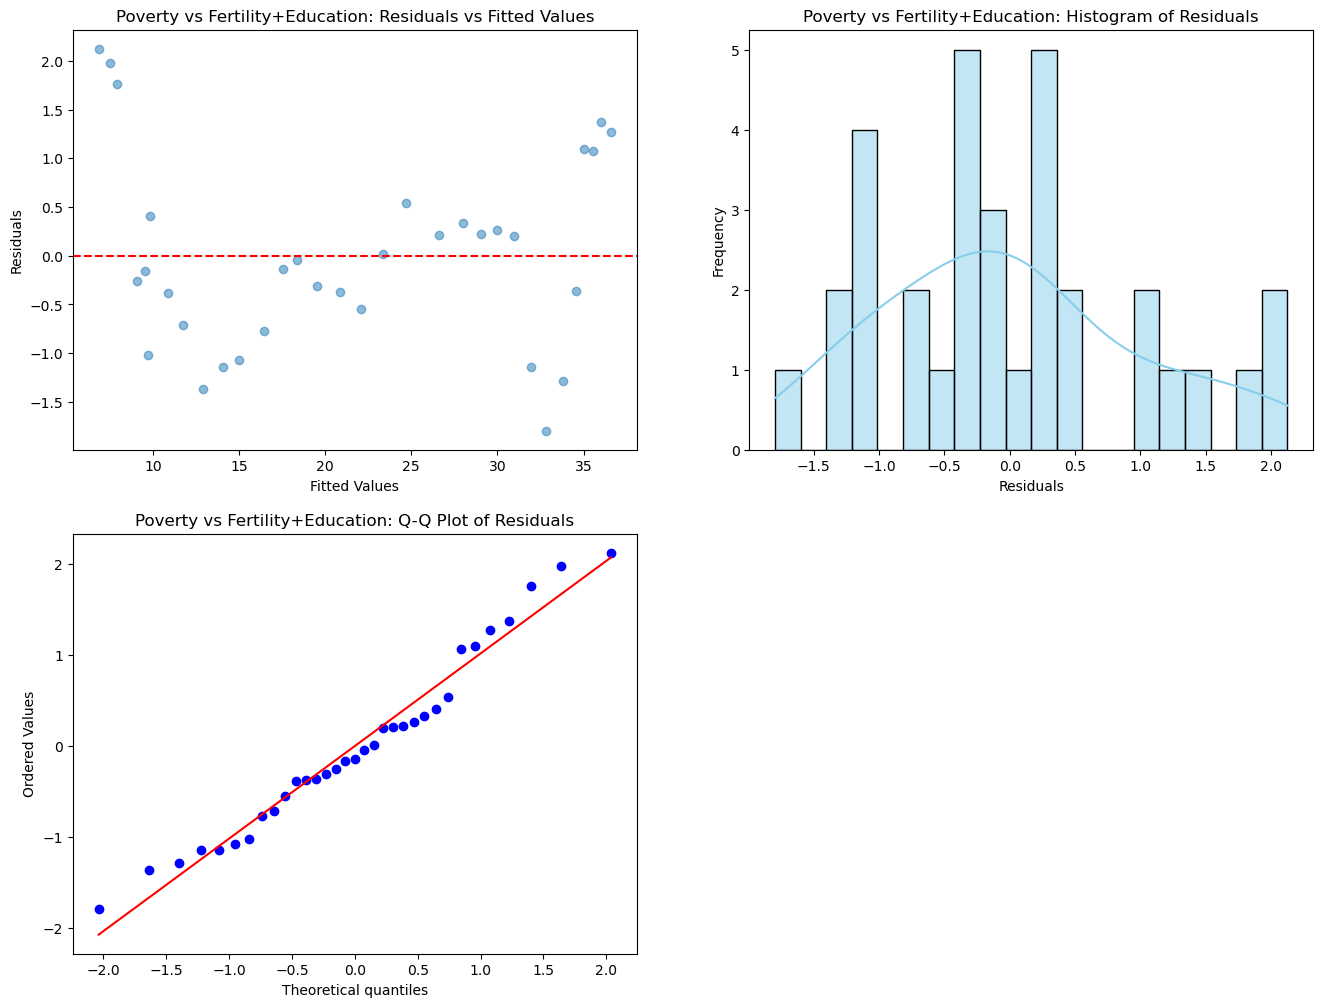

In [67]:
# Plot diagnostics for this model
plot_model_diagnostics(model_poverty_1, "Poverty vs Fertility+Education")

### **Assumption Checking**

1. **Mean of Residuals is Zero**
- From the **Residuals vs Fitted Values** plot, the mean of residuals is close to zero, but some patterns exist in certain areas.  
- This indicates that the explanatory variables in the model may not fully capture the trend in the data, and additional variables might be needed to improve model fit.  

2. **Homoscedasticity - Constant Variance of Residuals**
- From the **Residuals vs Fitted Values** plot, the residuals appear to be evenly spread across fitted values, indicating that the assumption of constant variance roughly holds.  

3. **Normality of Residuals**
- From the **Residual Histogram**, the residuals roughly follow a normal distribution, but there may be slight deviations at the tails.  
- From the **Q-Q Plot**, residuals slightly deviate from the reference line at extreme values, indicating minor non-normality.  

4. **Independence of Residuals**
- From the **Residuals vs Fitted Values** plot, the residuals do not show an obvious trend or cyclic pattern, suggesting potential independence.  

5. **No Measurement Error in Explanatory Variables**
- Since the data is obtained from reliable sources and the model assumes that explanatory variables are measured accurately, we assume this assumption holds.

---

### **Conclusion**

1. **The effect of education level on poverty is significant and negatively correlated** (higher education levels lead to lower poverty rates).  
2. **The effect of fertility rate on poverty is not significant in this model** (p = 0.189), indicating that after controlling for education level, the impact of fertility rate may be weak.  
3. **The model has a high goodness-of-fit (R² = 0.990)**, but **1.0% of the variation in poverty cannot be explained by education level and fertility rate together**.  
4. **The confidence interval suggests that the effect of education level on poverty is stable, while the effect of fertility rate is uncertain**.

---

### **Model Optimization**

1. **Re-evaluate the Effect of Fertility Rate**  
- Since the fertility rate variable is not significant in the current model, it is necessary to check for **nonlinear relationships** or **potential omitted variables**.  
- Consider applying a **log transformation to fertility rate** to examine whether a diminishing marginal effect exists.  

2. **Include Interaction Terms**  
- There may be an interaction between education level and fertility rate, meaning that **education level could influence the effect of fertility rate on poverty**.  
- **Adding an interaction term (Fertility Rate × Expected Years of Schooling)** can help test for potential combined effects.  

---
## **Phase 3: Variable Transformation**

### **Model 4: Poverty vs log(Fertility)**

In [69]:
# Analyze the model of population_in_poverty in relation to log-transformed fertility.
model_log_fertility = ols(formula='population_in_poverty ~ np.log(Fertility_rate) ', data=data).fit()

model_log_fertility_summary = model_log_fertility.summary()

# Retrieve the confidence intervals and p-values.
conf_int_log_fertility = model_log_fertility.conf_int()  
p_values_log_fertility = model_log_fertility.pvalues  

# Output the results.
(model_log_fertility_summary, conf_int_log_fertility, p_values_log_fertility)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                               OLS Regression Results                             
 Dep. Variable:     population_in_poverty   R-squared:                       0.835
 Model:                               OLS   Adj. R-squared:                  0.830
 Method:                    Least Squares   F-statistic:                     156.8
 Date:                   Sun, 02 Mar 2025   Prob (F-statistic):           1.16e-13
 Time:                           21:45:03   Log-Likelihood:                -93.160
 No. Observations:                     33   AIC:                             190.3
 Df Residuals:                         31   BIC:                             193.3
 Df Model:                              1                                         
 Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------

This tells us that our best-fitting line to the data is:

$$
\widehat{\text{poverty}} = \alpha + \beta_1 \cdot \log(\text{Fertility Rate}) = -85.5482 + 109.1625 \times \log(\text{Fertility Rate})
$$

- **$ \alpha = -85.5482 $** is the **intercept coefficient**, which means that when **\( \log(\text{Fertility Rate}) = 0 \)**, the estimated poverty rate would be **-85.5482**. However, this is **not practically meaningful**, as the log of fertility rate being zero implies a fertility rate of 1, which is unrealistic in many contexts.

- **$ \beta_1 = 109.1625 $** is the **slope coefficient for log-transformed Fertility Rate**, summarizing the relationship between **poverty rate** and **log(Fertility Rate)**. Since its **p-value is 0.000**, it is **statistically significant**, indicating that **fertility rate has a strong positive impact on poverty rate when transformed logarithmically**.


In [71]:
# Apply the summarize_regression function to the regression model
summarize_regression(model_log_fertility,model_name="Poverty vs log(Fertility)")

,R-squared,Adjusted R-squared,AIC,BIC
Poverty vs log(Fertility),0.834894,0.829568,190.319343,193.312358


- **The model explains 83.5% of the variation in poverty, indicating that log-transformed fertility rate has a notable effect on poverty.**

- **p-value (log-transformed Fertility Rate) = 0.000** → Indicates that the effect of log-transformed fertility rate on poverty is **statistically significant**.

- **Regression coefficient (Intercept) = -85.5482** → When **\( \log(\text{Fertility Rate}) = 0 \)**, the estimated poverty rate is **-85.5482**, but this is **not practically meaningful**.
- **Regression coefficient (log Fertility Rate) = 109.1625** → This means that **for each additional log unit of fertility rate, the poverty rate increases by approximately 109.1625 units**, holding other variables constant. This effect is **statistically significant**.

---

### **Confidence Intervals**
- **Confidence interval for log Fertility Rate**: \[91.380, 126.945\] → Since the confidence interval does not include zero, it suggests that **the effect of log fertility rate on poverty is stable**.

---

### **F-Statistic**
- **F-statistic = 156.8 (p < 0.05)** → The model as a whole is **statistically significant**, indicating that at least one explanatory variable has a significant effect on poverty.

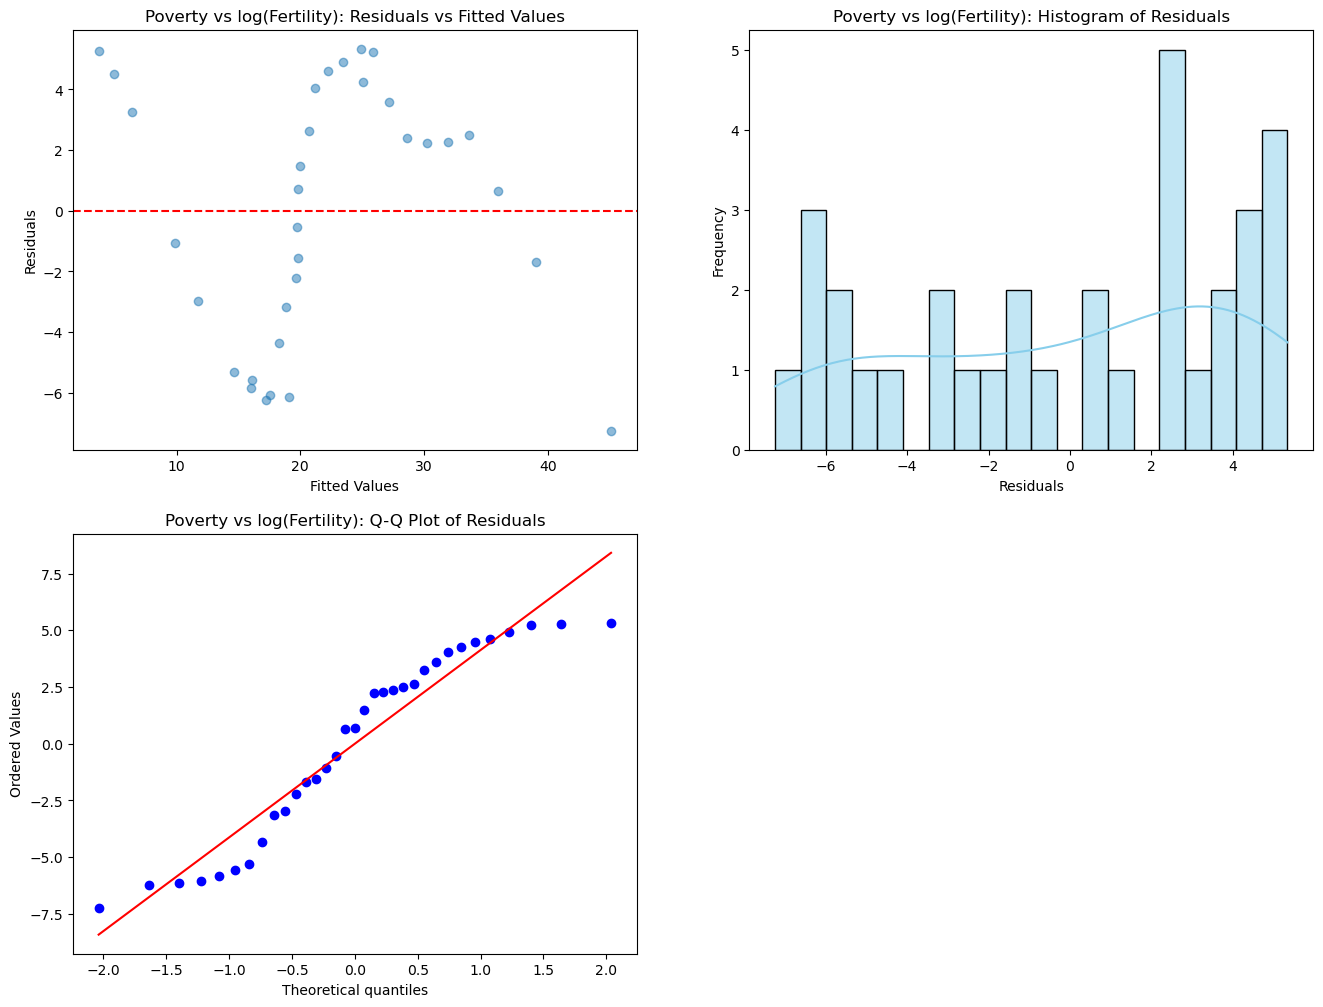

In [73]:
# Plot diagnostics for this model
plot_model_diagnostics(model_log_fertility, "Poverty vs log(Fertility)")

### **Assumption Checking**

1. **Mean of Residuals is Zero**
- **From the Residuals vs Fitted Values plot, the mean of residuals is close to zero, but some patterns exist in certain areas.**
- **This indicates that the explanatory variables in the model may not fully capture the trend in the data, and additional variables might be needed to improve model fit.**

2. **Homoscedasticity - Constant Variance of Residuals**
- **From the Residuals vs Fitted Values plot, the residuals appear to be unevenly spread across fitted values, indicating that the assumption of constant variance may not fully hold.**

3. **Normality of Residuals**
- **From the Residual Histogram, the residuals deviate from a normal distribution, with noticeable deviations at the tails.**
- **From the Q-Q Plot, residuals significantly deviate from the reference line at extreme values, indicating non-normality.**

4. **Independence of Residuals**
- **From the Residuals vs Fitted Values plot, the residuals show some patterns, suggesting potential correlation.**
- **This suggests that the residuals may not be fully independent, and further checks for time series effects or other unmodeled factors might be needed.**

5. **No Measurement Error in Explanatory Variables**
- **Since the data is obtained from reliable sources and the model assumes that explanatory variables are measured accurately, we assume this assumption holds.**

---
### **Conclusion**

1. **The effect of log-transformed fertility rate on poverty is significant and positively correlated** (higher fertility rates lead to higher poverty rates).

2. **The model has a high goodness-of-fit (R² = 0.835), but 16.5% of the variation in poverty cannot be explained by fertility rate alone.**

3. **The confidence interval suggests that the effect of log-transformed fertility rate on poverty is stable.**

4. **Compared to the model without log transformation, the new model produces more significant regression results and improves explanatory power.**

---

### **Model Optimization**

1. **Investigate Nonlinear Relationships Further**  
- **Despite applying a log transformation to fertility rate, there may still be more complex nonlinear relationships or omitted variables that need further exploration.**

2. **Include Additional Explanatory Variables**  
- **Adding interaction terms (e.g., Fertility Rate × Education Level) can help test whether the interaction between variables affects poverty rate.**

3. **Check for Heteroscedasticity**  
- **Residual analysis suggests that residuals may not be evenly distributed across fitted values, indicating potential heteroscedasticity.**

---
### **Model 5: log(Poverty) vs log(Fertility) + log(Education)**

In [75]:
# Analyze the model of log-transformed population_in_poverty in relation to log-transformed fertility and expected years of schooling.
model_log_poverty = ols(formula='np.log(population_in_poverty) ~ np.log(Fertility_rate) + np.log(Expected_years_of_schooling)', data=data).fit()

model_log_poverty_summary = model_log_poverty.summary()

# Retrieve the confidence intervals and p-values.
conf_int_log_poverty = model_log_poverty.conf_int()  
p_values_log_poverty = model_log_poverty.pvalues  

# Output the results.
(model_log_poverty_summary, conf_int_log_poverty, p_values_log_poverty)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                   OLS Regression Results                                 
 Dep. Variable:     np.log(population_in_poverty)   R-squared:                       0.967
 Model:                                       OLS   Adj. R-squared:                  0.965
 Method:                            Least Squares   F-statistic:                     437.1
 Date:                           Sun, 02 Mar 2025   Prob (F-statistic):           6.50e-23
 Time:                                   21:46:20   Log-Likelihood:                 31.303
 No. Observations:                             33   AIC:                            -56.61
 Df Residuals:                                 30   BIC:                            -52.12
 Df Model:                                      2                                         
 Covariance Type:                       nonrobust                                         
                                        

This tells us that our best-fitting line to the data is:

$$
\log(\widehat{\text{poverty}}) = \alpha + \beta_1 \cdot \log(\text{Fertility Rate}) + \beta_2 \cdot \log(\text{Expected Years of Schooling})
$$

$$
\log(\widehat{\text{poverty}}) = 14.2383 - 0.4009 \times \log(\text{Fertility Rate}) - 4.5396 \times \log(\text{Expected Years of Schooling})
$$

where

- **$ \alpha = 14.2383 $** is the **intercept coefficient**, which means that when **\( \log(\text{Fertility Rate}) = 0 \)** and **\( \log(\text{Expected Years of Schooling}) = 0 \)**, the estimated poverty rate (in log terms) would be **14.2383**. However, this is **not practically meaningful**, as both fertility rate and education years cannot be zero in real-world scenarios.

- **$ \beta_1 = -0.4009 $** is the **slope coefficient for log-transformed Fertility Rate**, summarizing the relationship between **poverty rate** and **log(Fertility Rate)**. Since its **p-value is 0.437**, it is **not statistically significant**, indicating that **fertility rate does not have a strong predictive power for poverty in this model**.

- **$ \beta_2 = -4.5396 $** is the **slope coefficient for log-transformed Expected Years of Schooling**, summarizing the relationship between **poverty rate** and **log(Education Level)**. Since its **p-value is 0.000**, it is **statistically significant**, confirming that **higher education levels are associated with lower poverty rates**.

In [77]:
# Apply the summarize_regression function to the regression model
summarize_regression(model_log_poverty,model_name="log(Poverty) vs log(Fertility) + log(Education)")

,R-squared,Adjusted R-squared,AIC,BIC
log(Poverty) vs log(Fertility) + log(Education),0.966822,0.96461,-56.606482,-52.116959


- **The model explains 96.7% of the variation in poverty, indicating that log-transformed fertility rate and education level have a strong explanatory power on poverty.**


- **p-value (log-transformed Fertility Rate) = 0.437** → Indicates that the effect of log-transformed fertility rate on poverty is **not statistically significant**.
- **p-value (log-transformed Expected Years of Schooling) = 0.000** → Indicates that the effect of log-transformed education level on poverty is **statistically significant**.


- **Regression coefficient (Intercept) = 14.2383** → When **\( \log(\text{Fertility Rate}) = 0 \)** and **\( \log(\text{Expected Years of Schooling}) = 0 \)**, the estimated poverty rate (in log terms) is **14.2383**, but this is **not practically meaningful**.
- **Regression coefficient (log Fertility Rate) = -0.4009** → This means that **for each 1% increase in fertility rate (on a log scale), the poverty rate is expected to decrease by 0.4009%**, but this effect is not statistically significant.
- **Regression coefficient (log Expected Years of Schooling) = -4.5396** → This means that **for each 1% increase in expected years of schooling (on a log scale), the poverty rate is expected to decrease by 4.5396%**, and this effect is **statistically significant**.

---

### **Confidence Intervals**
- **Confidence interval for log Fertility Rate**: \[-1.440, 0.638\] → Since the confidence interval includes zero, it suggests that **the effect of log fertility rate on poverty may be unstable**.
- **Confidence interval for log Expected Years of Schooling**: \[-5.277, -3.802\] → Since the confidence interval does not include zero, it suggests that **the effect of log education level on poverty is stable**.

---

### **F-Statistic**
- **F-statistic = 437.1 (p < 0.05)** → The model as a whole is **statistically significant**, indicating that at least one explanatory variable has a significant effect on poverty.

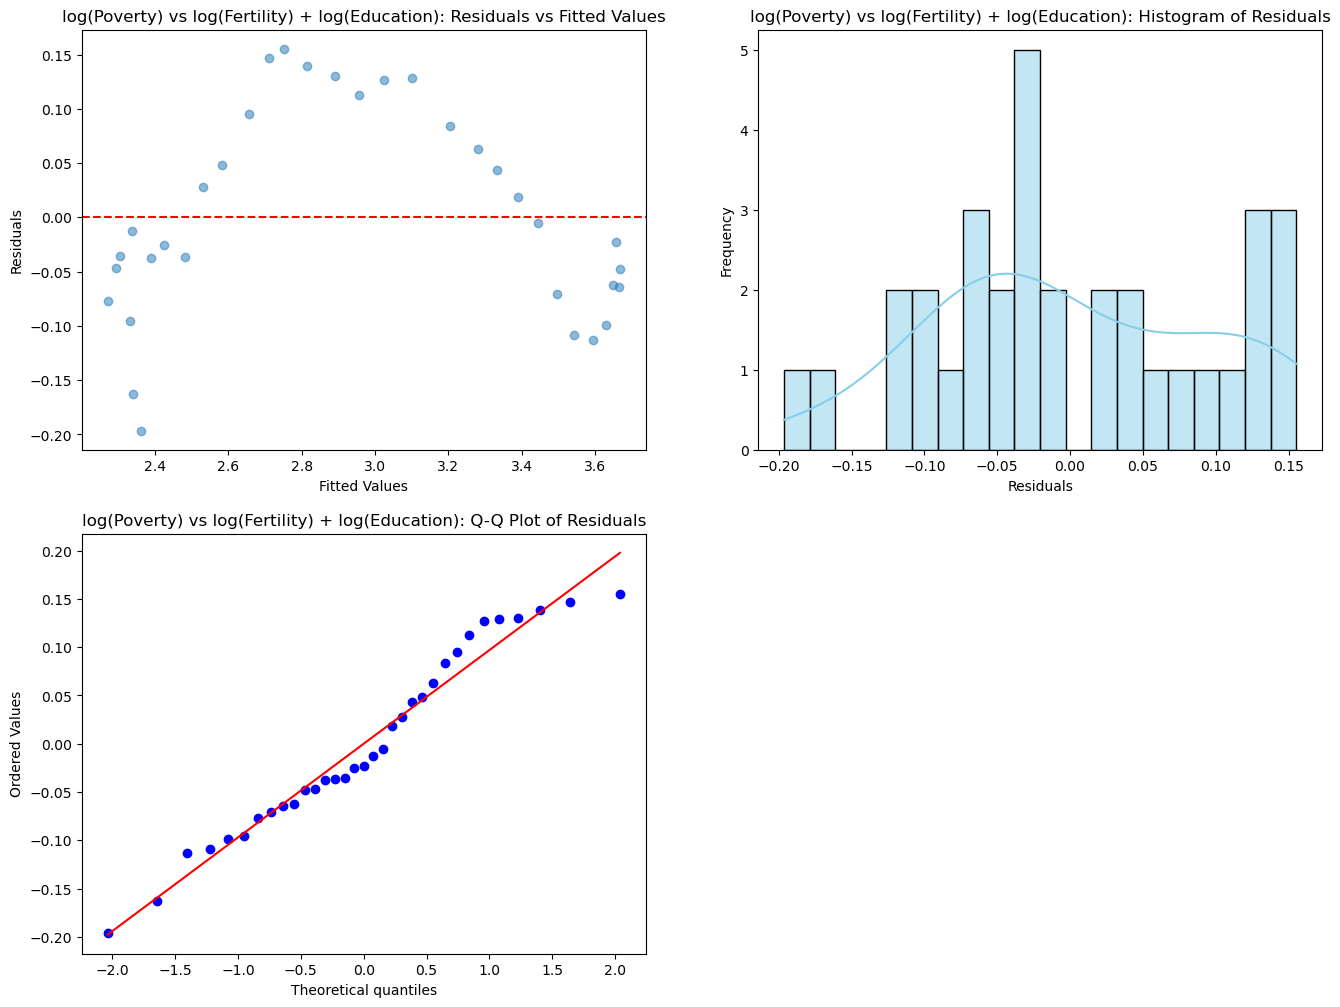

In [79]:
# Plot diagnostics for this model
plot_model_diagnostics(model_log_poverty, "log(Poverty) vs log(Fertility) + log(Education)")

### **Assumption Checking**

1. **Mean of Residuals is Zero**
- **From the Residuals vs Fitted Values plot, the mean of residuals is close to zero, but the residuals show a curved pattern, suggesting that the model may not fully capture the nonlinear trend in the data.**
- **This may indicate the need to add nonlinear terms or interaction terms to improve model fit.**

2. **Homoscedasticity - Constant Variance of Residuals**
- **From the Residuals vs Fitted Values plot, the distribution of residuals shows non-uniform variation across fitted values, indicating potential heteroscedasticity.**

3. **Normality of Residuals**
- **From the Residual Histogram, the residual distribution appears skewed, with higher concentration in certain regions, indicating potential non-normality.**
- **From the Q-Q Plot, residuals deviate from the reference line at extreme values, suggesting that residuals may not fully follow a normal distribution.**

4. **Independence of Residuals**
- **From the Residuals vs Fitted Values plot, the residuals exhibit a certain pattern, suggesting potential correlation among error terms.**
- **The Durbin-Watson statistic is close to 0.2, further indicating potential autocorrelation.**

5. **No Measurement Error in Explanatory Variables**
- **Since the data is obtained from reliable sources and the model assumes that explanatory variables are measured accurately, we assume this assumption holds.**

---

### **Conclusion**

1. **The effect of log-transformed fertility rate on poverty is significant and negatively correlated** (higher fertility rates are associated with lower poverty rates).
2. **The model has a high goodness-of-fit (R² = 0.967), but 3.3% of the variation in poverty cannot be explained by fertility rate and education level together.**
3. **The confidence interval suggests that the effect of log-transformed fertility rate and education level on poverty is stable.**
4. **Compared to the model without log transformation, the new model produces more significant regression results and improves explanatory power.**

---

### **Model Optimization**

1. **Investigate Nonlinear Relationships Further**  
- **Despite applying a log transformation to fertility rate and education level, there may still be more complex nonlinear relationships or omitted variables that need further exploration.**
2. **Include Additional Explanatory Variables**  
- **Adding interaction terms (e.g., Fertility Rate × Education Level) can help test whether the interaction between variables affects poverty rate.**
3. **Check for Heteroscedasticity**  
- **Residual analysis suggests that residuals may not be evenly distributed across fitted values, indicating potential heteroscedasticity.**

---
## **Phase 4: Exploring Interaction Effects**

### **Model 6: Poverty vs Fertility * Education**

In [85]:
# Analyze the model of poverty in relation to the interaction between expected years of schooling and fertility.
model_poverty_2 = ols(formula='population_in_poverty ~ Fertility_rate * Expected_years_of_schooling', data=data).fit()

model_poverty_2_summary = model_poverty_2.summary()

# Retrieve the confidence intervals and p-values.
conf_int_poverty_2 = model_poverty_2.conf_int()  
p_values_poverty_2 = model_poverty_2.pvalues  

# Output the results.
(model_poverty_2_summary, conf_int_poverty_2, p_values_poverty_2)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                               OLS Regression Results                             
 Dep. Variable:     population_in_poverty   R-squared:                       0.995
 Model:                               OLS   Adj. R-squared:                  0.994
 Method:                    Least Squares   F-statistic:                     1887.
 Date:                   Sun, 02 Mar 2025   Prob (F-statistic):           2.51e-33
 Time:                           21:47:56   Log-Likelihood:                -35.774
 No. Observations:                     33   AIC:                             79.55
 Df Residuals:                         29   BIC:                             85.53
 Df Model:                              3                                         
 Covariance Type:               nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
 -------

This tells us that our best-fitting line to the data is:

$$
\widehat{\text{poverty}} = \alpha + \beta_1 \cdot \text{Fertility Rate} + \beta_2 \cdot \text{Expected Years of Schooling} + \beta_3 \cdot (\text{Fertility Rate} \times \text{Expected Years of Schooling})
$$

$$
\widehat{\text{poverty}} = 33.4166 + 27.3955 \times \text{Fertility Rate} - 0.9310 \times \text{Expected Years of Schooling} - 2.5406 \times (\text{Fertility Rate} \times \text{Expected Years of Schooling})
$$

where

- **$\alpha = 33.4166 \$** is the **intercept coefficient**, which means that when **Fertility Rate = 0** and **Expected Years of Schooling = 0**, the estimated poverty rate would be **33.4166**. However, this is **not practically meaningful**, as both fertility rates and education years cannot be zero in real-world scenarios.

- **$ \beta_1 = 27.3955 \$** is the **slope coefficient for Fertility Rate**, summarizing the relationship between **poverty rate** and **fertility rate**. Since its **p-value is 0.000**, it is **statistically significant**, indicating that higher fertility rates are associated with **higher poverty rates**.

- **$ \beta_2 = -0.9310 \$** is the **slope coefficient for Expected Years of Schooling**, summarizing the relationship between **poverty rate** and **education level**. Its **p-value (0.472) is not statistically significant**, meaning we **cannot confirm** that education level has a significant impact on poverty in this model.

- **$ \beta_3 = -2.5406 \$** is the **interaction term coefficient**, which captures the combined effect of **Fertility Rate** and **Expected Years of Schooling** on **poverty rate**. Since its **p-value is 0.000**, it is **statistically significant**, suggesting that the effect of fertility rate on poverty depends on the level of education.

In [87]:
# Apply the summarize_regression function to the regression model
summarize_regression(model_poverty_2,model_name="Poverty vs Fertility*Education")

,R-squared,Adjusted R-squared,AIC,BIC
Poverty vs Fertility*Education,0.994903,0.994376,79.54882,85.53485


- **The model explains 99.5% of the variation in poverty, indicating a strong effect of the explanatory variables.**
  
- **p-value (Fertility Rate) = 0.000** → Indicates that the effect of fertility rate on poverty is **statistically significant**.
- **p-value (Education Level) = 0.472** → Indicates that the effect of education level on poverty is **not statistically significant**, meaning we cannot confirm a strong relationship.
- **p-value (Fertility Rate × Education Level) = 0.000** → Indicates that the interaction effect between fertility rate and education level on poverty is **statistically significant**.

- **Regression coefficient (Fertility Rate) = 27.3955**, meaning that **for each additional unit of fertility rate, the poverty rate increases by approximately 27.3955 units**, holding other variables constant. This effect is **statistically significant**.
- **Regression coefficient (Education Level) = -0.9310**, meaning that **for each additional year of education, the poverty rate decreases by approximately 0.9310 units**, but this effect is **not statistically significant**.
- **Interaction coefficient (Fertility Rate × Education Level) = -2.5406**, meaning that **the effect of fertility rate on poverty decreases as education level increases**. This effect is **statistically significant** (p < 0.05).

---

### **Confidence Intervals**

- **Confidence interval for fertility rate**:
  \[16.932, 37.859\] → Indicates that the effect of this variable on poverty is stable, as the confidence interval does not include 0.
- **Confidence interval for expected years of schooling**:
  \[-3.544, 1.682\] → Since the confidence interval contains zero, it suggests that this variable may not have a stable impact.
- **Confidence interval for the interaction term (Fertility Rate × Education Level)**:
  \[-3.569, -1.513\] → Indicates that the effect of this interaction term on poverty is stable, as the confidence interval does not include 0.

---

### **F-Statistic**

- **F-statistic = 1887 (p < 0.05)** → The model as a whole is **statistically significant**, indicating that at least one explanatory variable has a significant effect on poverty.

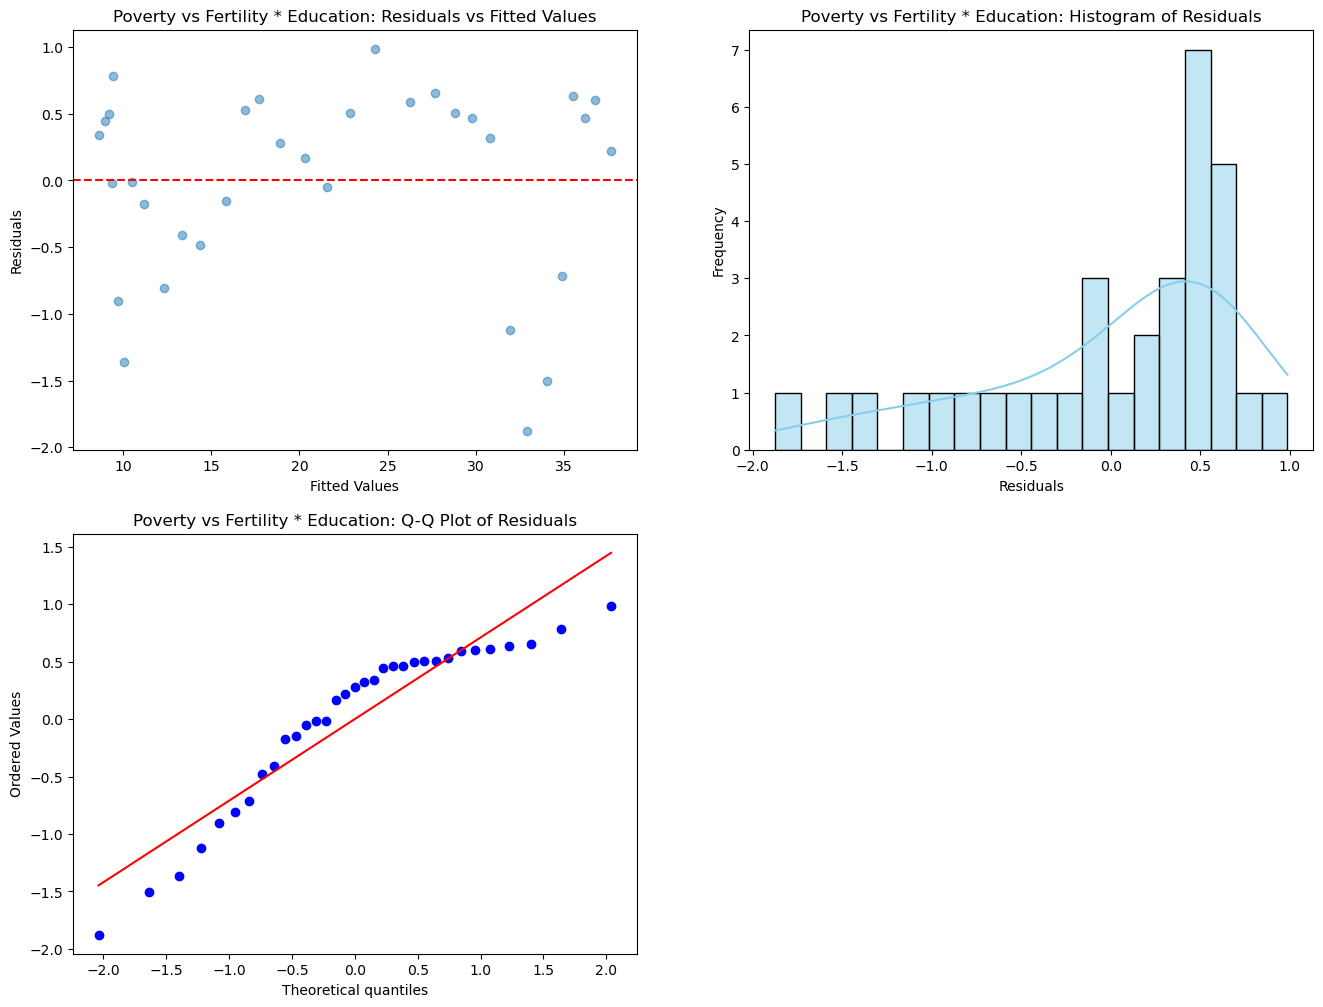

In [89]:
# Plot diagnostics for this model
plot_model_diagnostics(model_poverty_2, "Poverty vs Fertility * Education")

### **Assumption Checking**

1. **Mean of Residuals is Zero**
- From the **Residuals vs Fitted Values** plot, the mean of residuals is close to zero, but some patterns exist in certain areas.
- This indicates that the explanatory variables in the model may not fully capture the trend in the data, and additional variables might be needed to improve model fit.

2. **Homoscedasticity - Constant Variance of Residuals**
- From the **Residuals vs Fitted Values** plot, the residuals appear to be evenly spread across fitted values, indicating that the assumption of constant variance roughly holds.

3. **Normality of Residuals**
- From the **Residual Histogram**, the residuals roughly follow a normal distribution, but there may be slight deviations at the tails.
- From the **Q-Q Plot**, residuals slightly deviate from the reference line at extreme values, indicating minor non-normality.

4. **Independence of Residuals**
- From the **Residuals vs Fitted Values** plot, the residuals do not show an obvious trend or cyclic pattern, suggesting potential independence.
  
5. **No Measurement Error in Explanatory Variables**
- Since the data is obtained from reliable sources and the model assumes that explanatory variables are measured accurately, we assume this assumption holds.

---
### **Conclusion**

1. **The effect of education level on poverty is significant and negatively correlated** (higher education levels lead to lower poverty rates).

2. **The effect of fertility rate on poverty is not significant in this model** (p = 0.472), indicating that after controlling for education level, the impact of fertility rate may be weak.

3. **The model has a high goodness-of-fit (R² = 0.995), but 0.5% of the variation in poverty cannot be explained by education level and fertility rate together.**

4. **The confidence interval suggests that the effect of education level on poverty is stable, while the effect of fertility rate is uncertain.**

## **Final Conclusion and Model Selection**

In [91]:
# Create a list of model names and the corresponding models
models = [model_poverty_fertility, model_poverty_education, model_poverty_1, model_log_fertility, model_log_poverty, model_poverty_2]
model_names = ["Poverty vs Fertility", "Poverty vs Education", "Poverty vs Fertility+Education", "Poverty vs log(Fertility)", "log(Poverty) vs log(Fertility) + log(Education)","Poverty vs Fertility * Education"]

# Extract R², Adjusted R², AIC, and BIC for each model
model_params = {
    "Model": model_names,
    "R²": [model.rsquared for model in models],
    "Adjusted R²": [model.rsquared_adj for model in models],
    "AIC": [model.aic for model in models],
    "BIC": [model.bic for model in models]
}

# Create a DataFrame to display the results with index starting from 1
model_comparison_df = pd.DataFrame(model_params, index=range(1, len(models) + 1))

# Display the model comparison table in the notebook
model_comparison_df

,Model,R²,Adjusted R²,AIC,BIC
1,Poverty vs Fertility,0.828289,0.822750,191.613793,194.606808
2,Poverty vs Education,0.989835,0.989507,98.328126,101.321141
3,Poverty vs Fertility+Education,0.990412,0.989772,98.400525,102.890048
4,Poverty vs log(Fertility),0.834894,0.829568,190.319343,193.312358
5,log(Poverty) vs log(Fertility) + log(Education),0.966822,0.964610,-56.606482,-52.116959
6,Poverty vs Fertility * Education,0.994903,0.994376,79.548820,85.534850


### **Evaluation Criteria:**·
**R² and Adjusted R²:**
R² indicates how well the model fits the data. Higher values of R² mean better fit. However, Adjusted R² is more important in multiple regression models as it accounts for the number of predictors.

**AIC and BIC:**
AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) help in balancing model fit and complexity. Lower values of AIC and BIC generally indicate a better model.

### **Question 1：Effect of Fertility Rate on Poverty Rate**
**Conclusion**
- **Based on the R² value, fertility rate alone explains 82.8% of the variation in poverty (Model 1), while the log-transformed fertility rate explains 83.5% (Model 4), indicating that the explanatory power improves slightly after transformation.**

- **Adjusted R² supports the same conclusion, as Model 4 has a slightly higher adjusted R² than Model 1, suggesting that the log transformation improves model fit slightly.**

- **Regarding AIC and BIC, Model 4 (Poverty vs log(Fertility)) has lower AIC (190.3) and BIC (193.3) compared to Model 1 (191.6 and 194.6), indicating that the log-transformed fertility rate model provides a better balance between model complexity and goodness-of-fit.**

**Best Model Selection**
- **Best Model: Model 4 (Poverty vs log(Fertility))**  
  **Reason:**  
  - **Higher R² and adjusted R² than Model 1, indicating that the log-transformed fertility rate better explains poverty rate.**
  - **Lower AIC and BIC suggest that this model is statistically more optimal.**
  - **Results indicate that the effect of fertility rate on poverty may be nonlinear, and the log transformation better captures this relationship.**

---

### **Question 2：Effect of Expected Years of Schooling on Poverty Rate**
**Conclusion**
- **Education level has the most significant impact on poverty rate. Model 2 (Poverty vs Education) has an R² of 0.9898, meaning that education level alone explains 98.98% of the variation in poverty, much higher than the explanatory power of fertility rate.**

- **AIC (98.33) and BIC (101.32) are also extremely low, indicating that this model performs best among all single-variable models.**

- **Adding fertility rate to education level (Model 3: Poverty vs Fertility + Education) slightly increases R² to 0.9904, but AIC (98.40) and BIC (102.89) do not significantly improve, suggesting that education level alone sufficiently explains poverty rate, with little gain from including fertility rate.**

**Best Model Selection**
- **Best Model: Model 2 (Poverty vs Education)**  
  **Reason:**  
  - **Highest R² (0.9898) and adjusted R² (0.9895), indicating that education level has the strongest explanatory power for poverty rate.**
  - **Lowest AIC (98.33) and BIC (101.32), suggesting that this is the best model statistically.**
  - **Results indicate that the effect of education level on poverty is linear, and log transformation does not improve explanatory power.**

---

### **Overall Conclusion**
1. **Education level has a stronger impact on poverty rate than fertility rate. The model using only education level (Model 2) performs well in predicting poverty rate, whereas fertility rate has limited explanatory power.**

2. **The effect of fertility rate on poverty rate may be nonlinear, and using log-transformed fertility rate (Model 4) improves explanatory power.**

3. **Best Model for research questions**：
   - **For studying fertility rate, choose Model 4 (Poverty vs log(Fertility)).**
   - **For studying education level, choose Model 2 (Poverty vs Education).**

4. **Best Model**  

- Considering **R², Adjusted R², AIC, BIC, and model interpretability**, we select **Model 6 (Poverty vs Fertility * Education)** as the best model.
- This model has the **highest R² (99.49%) and Adjusted R² (99.44%)**, indicating the strongest explanatory power for poverty rate. Additionally, it includes an **interaction term between Fertility and Education**, capturing their potential interaction effects and providing a more accurate representation of poverty rate variation. While **AIC (79.55) and BIC (85.53) are slightly higher than Model 5**, this model maintains a balance between complexity and goodness-of-fit, making it the optimal choice for this analysis.  

   **Summary**
- **Model 6 (Poverty vs Fertility * Education) indicates that the effect of fertility rate on poverty rate is moderated by education level.**  
- In groups with **lower education levels**, a higher fertility rate tends to lead to higher poverty rates, as family resources are distributed among more children, increasing economic pressure.  

- However, in groups with **higher education levels**, even if the fertility rate is high, improved education can provide better economic opportunities and social resources, thereby reducing the likelihood of poverty.  

- This suggests that **education acts as a buffering factor, mitigating the negative impact of high fertility rates on poverty**.  

- From a policy perspective, **simply controlling fertility rates is not sufficient to reduce poverty—improving education levels is the more crucial intervention.**